# Encoding

##### Changing text or categories into numbers so that machines can understand and use them in models.
##### Computers can’t understand words like "Male", "Red", or "Graduate" directly.
##### They only understand numbers like 0, 1, 2…

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
a = pd.read_csv('new_data_en.csv')
a

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


### 1.OneHotEncoding

##### Creates a separate column for each category with 1s and 0s.
##### Example:
##### "Red" → [1, 0, 0], "Green" → [0, 1, 0], "Blue" → [0, 0, 1]
##### Use when: You have non-ordered categories like color, gender, city.

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
ohe = OneHotEncoder(sparse_output=False,drop=None)
ohe

OneHotEncoder(sparse_output=False)

In [45]:
fuel_type_encoded = ohe.fit_transform(a[['fuel-type']])
fuel_type_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [47]:
fuel_data_a = pd.DataFrame(fuel_type_encoded,columns=ohe.get_feature_names_out(['fuel-type']))
fuel_data_a

,fuel-type_diesel,fuel-type_gas
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
200,0.0,1.0
201,0.0,1.0
202,0.0,1.0
203,1.0,0.0


In [53]:
a_ohe = pd.concat([a.drop('fuel-type',axis=1),fuel_data_a],axis=1)
a_ohe

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.0,1.0
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.0,1.0
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.0,1.0
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.0,1.0
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0.0,1.0
201,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0.0,1.0
202,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0.0,1.0
203,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,1.0,0.0


In [59]:
a_ohe[['fuel-type_diesel','fuel-type_gas']].head()

,fuel-type_diesel,fuel-type_gas
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


### 2.MostFrequantEncoding

##### Fills missing category values with the most common value.
##### Example:
##### If "Red" appears the most, missing values become "Red".
##### Use when: You're fixing missing values in categorical columns.

In [63]:
most_frq_value = a['num-of-doors'].mode()[0]
most_frq_value

'four'

In [65]:
# fill missing value with the most frequant value
a_most_frequant = a.copy()
a_most_frequant

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [71]:
a_most_frequant['num-of-doors']=a_most_frequant['num-of-doors'].fillna(most_frq_value)
a_most_frequant

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [73]:
a_most_frequant['num-of-doors'].head()

0     two
1     two
2     two
3    four
4    four
Name: num-of-doors, dtype: object

### 3.TargetEncoding

##### Replaces a category with the average of the target variable for that category.
##### Example:
##### If students in "Math" score on average 85, "Math" becomes 85.
##### Use when: You want to link category to prediction (used a lot in ML competitions).

In [81]:
make_mean = a.groupby('make')['price'].mean()
make_mean

make
alfa-romero      15498.333333
audi             17194.589908
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu            11061.814677
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          27761.825871
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

In [85]:
a['make_encoded'] = a['make'].map(make_mean)
a

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,15498.333333
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,15498.333333
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,15498.333333
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,17194.589908
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,17194.589908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,18063.181818
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,18063.181818
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,18063.181818
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,18063.181818


### 4.LabelEncoding

##### Turns each category into a number (like 0, 1, 2...).
##### Example:
##### "Cat" → 0, "Dog" → 1, "Rabbit" → 2
##### Use when: Categories are names, and there's no order.

In [89]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

In [97]:
a['aspiration_encoded'] = le.fit_transform(a['aspiration'])
a

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded,aspiration_encoded
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,15498.333333,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,15498.333333,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,15498.333333,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,17194.589908,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,17194.589908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,18063.181818,0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,18063.181818,1
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,18063.181818,0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,18063.181818,1


In [99]:
print(dict(zip(le.classes_,le.transform(le.classes_))))

{'std': 0, 'turbo': 1}


In [101]:
print(a[['aspiration','aspiration_encoded']].head())

  aspiration  aspiration_encoded
0        std                   0
1        std                   0
2        std                   0
3        std                   0
4        std                   0


### OrdinalEncoding

##### Turns ordered categories into numbers based on rank.
##### Example:
##### "Low" → 1, "Medium" → 2, "High" → 3
##### Use when: Categories have a meaningful order.

In [158]:
from sklearn.preprocessing import OrdinalEncoder

In [160]:
a['num-of-doors'] = a['num-of-doors'].fillna('two')

In [162]:
door_order = [['two','three','four','five']]

In [164]:
ord_enc = OrdinalEncoder(categories=door_order)
ord_enc

OrdinalEncoder(categories=[['two', 'three', 'four', 'five']])

In [168]:
a['doors_encoded'] = ord_enc.fit_transform(a[['num-of-doors']])
a

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded,aspiration_encoded,doors_encoded
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.0,15498.333333,0,0.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.0,15498.333333,0,0.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.0,15498.333333,0,0.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.0,17194.589908,0,2.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.0,17194.589908,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114.0,5400.0,23,28,16845.0,18063.181818,0,2.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160.0,5300.0,19,25,19045.0,18063.181818,1,2.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134.0,5500.0,18,23,21485.0,18063.181818,0,2.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106.0,4800.0,26,27,22470.0,18063.181818,1,2.0


In [170]:
print(a[['num-of-doors','doors_encoded']].head())

  num-of-doors  doors_encoded
0          two            0.0
1          two            0.0
2          two            0.0
3         four            2.0
4         four            2.0


# Binning

#### Binning means:
##### Putting numbers into groups or buckets.
##### Imagine you have students' marks out of 100. Now instead of using the exact number like 47 or 89, you group them like this:
##### 0–40 → "Low"
##### 41–70 → "Medium"
##### 71–100 → "High"

In [16]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import pandas as pd

# Sample data
data = {'Marks': [20, 35, 50, 65, 80, 95]}
df = pd.DataFrame(data)

# Create binner: 3 bins, ordinal encoding, uniform strategy
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Apply binning
df['Marks_Binned'] = binner.fit_transform(df[['Marks']])

# Show result
print(df)

   Marks  Marks_Binned
0     20           0.0
1     35           0.0
2     50           1.0
3     65           1.0
4     80           2.0
5     95           2.0


    Hours_Studied  Study_Level Study_Level_Label
0               1          0.0               Low
1               2          0.0               Low
2               3          0.0               Low
3               4          0.0               Low
4               5          0.0               Low
5               6          1.0            Medium
6               7          1.0            Medium
7               8          1.0            Medium
8               9          1.0            Medium
9              10          1.0            Medium
10             12          2.0              High
11             14          2.0              High
12             16          2.0              High
13             18          2.0              High
14             20          2.0              High


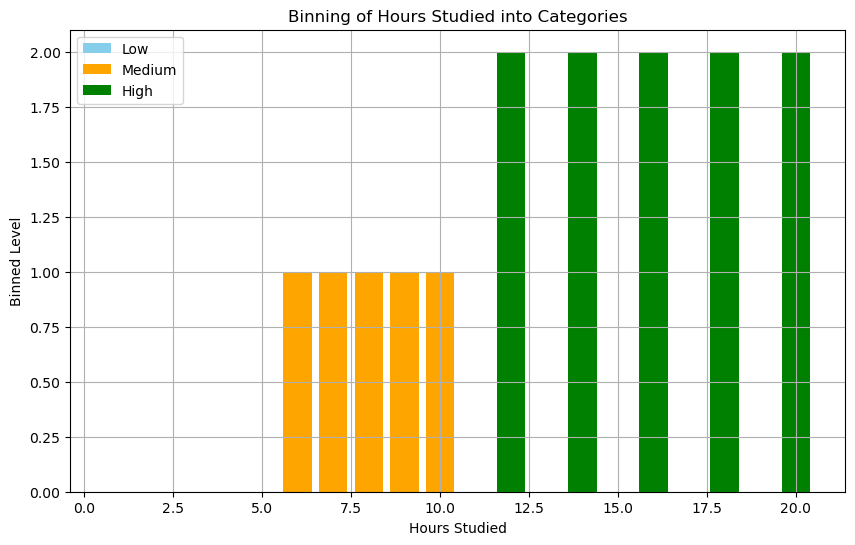

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Sample data (you can use your original df['Hours_Studied'] too)
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
}
df = pd.DataFrame(data)

# Binning: 3 bins with quantile strategy
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['Study_Level'] = kbins.fit_transform(df[['Hours_Studied']])

# Optional: Label the bins as categories
labels = ['Low', 'Medium', 'High']
df['Study_Level_Label'] = df['Study_Level'].map({0.0: 'Low', 1.0: 'Medium', 2.0: 'High'})

# Display result
print(df)

# Visualization
plt.figure(figsize=(10, 6))
colors = {'Low': 'skyblue', 'Medium': 'orange', 'High': 'green'}

for level in labels:
    subset = df[df['Study_Level_Label'] == level]
    plt.bar(subset['Hours_Studied'], subset['Study_Level'], color=colors[level], label=level)

plt.xlabel("Hours Studied")
plt.ylabel("Binned Level")
plt.title("Binning of Hours Studied into Categories")
plt.legend()
plt.grid(True)
plt.show()
